In [12]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [13]:
# Load iris data - we want to categorise the irises according to its features
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:
target_dict = {0.0:'type0',
               1.0:'type1',
               2.0:'type2'}

data['target'] = data['target'].map({0.0:'type0',
                                    1.0:'type1',
                                    2.0:'type2'})

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,type0
1,4.9,3.0,1.4,0.2,type0
2,4.7,3.2,1.3,0.2,type0
3,4.6,3.1,1.5,0.2,type0
4,5.0,3.6,1.4,0.2,type0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,type2
146,6.3,2.5,5.0,1.9,type2
147,6.5,3.0,5.2,2.0,type2
148,6.2,3.4,5.4,2.3,type2


In [15]:
X = data.drop('target', axis=1)
y = data.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
rf = RandomForestClassifier() # No arguments until we're ready to tune hyperparameters

# Train the classifier on the training data
rf = rf.fit(X_train, y_train)

# Check how well the classifier fits the test data
y_pred = rf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


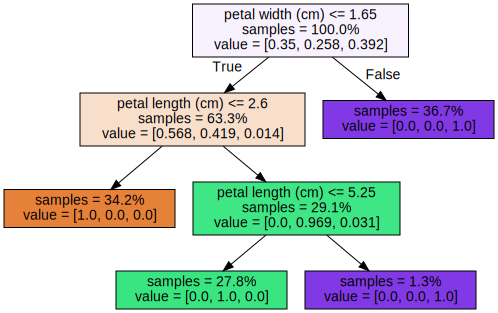

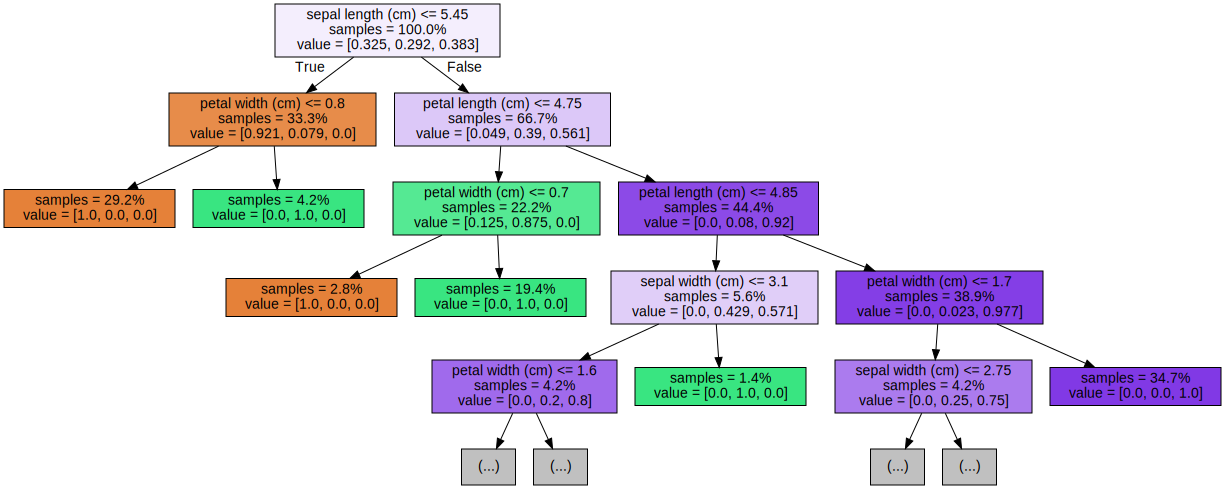

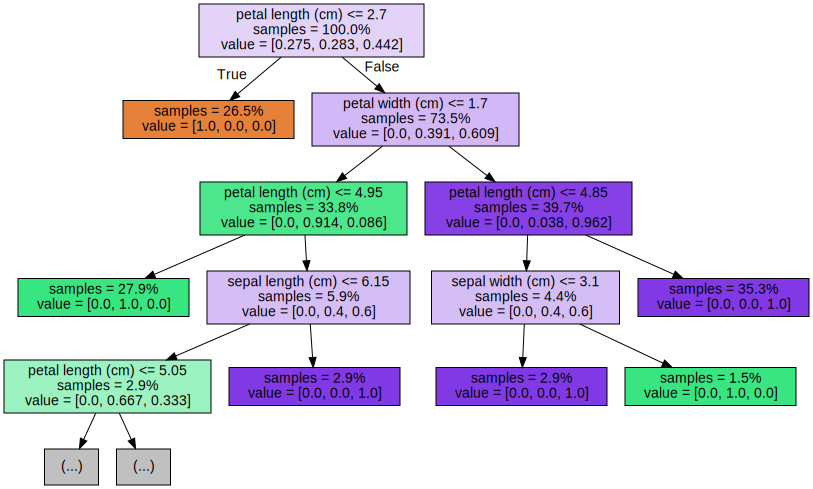

In [20]:
# Display trees with set index numbers
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=4, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [21]:
# Randomise parameters to make a bunch of random forest models, then run them and see which one was the best
dict = {'n_estimators':randint(50, 500),
        'max_depth':randint(1,20),
        }

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions=dict, n_iter=5, cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f60ed0c1810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f60ecea76a0>})

In [22]:
# Print the best parameters
best_rf = rand_search.best_estimator_
print(rand_search.best_params_)

{'max_depth': 6, 'n_estimators': 299}


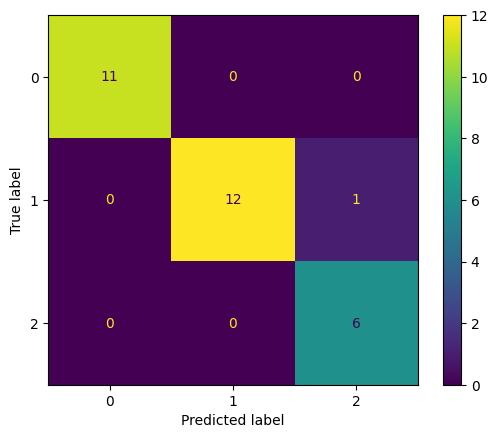

In [23]:
y_pred = best_rf.predict(X_test)

# Make a confusion matrix to compare y_pred with y_test
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [27]:
# Use k-nearest neighbours to find the most important features
from sklearn.neighbors import KNeighborsClassifier

best_acc = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_params = i

print("Accuracy:", acc)
print("Best parameter", i)


Accuracy: 0.9666666666666667
Best parameter 9


In [29]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

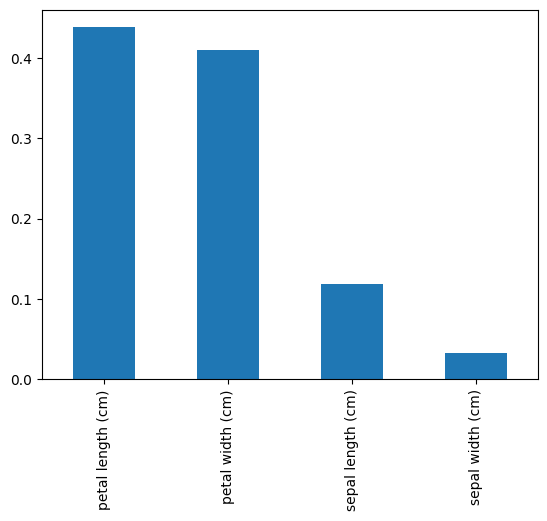

In [30]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();